In [ ]:
pip install opencv-python matplotlib numpy

In [ ]:
import cv2
import numpy as np
import google
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/IA/'
file_name_jpg= 'golden-retriever.jpeg'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = cv2.imread(file_path+file_name_jpg)


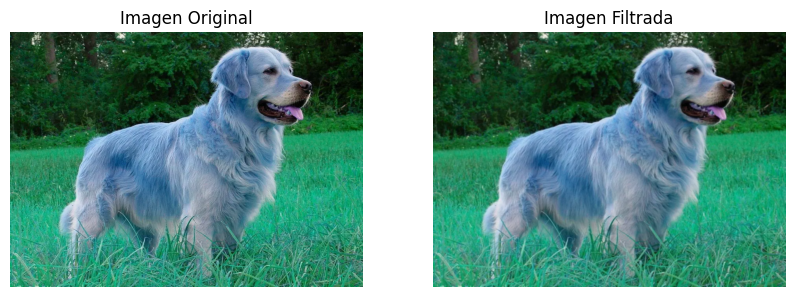

In [ ]:
def apply_convolution(kernel, output_path=None):
    """
    Aplica un kernel de convolución a una imagen y muestra los resultados.

    Args:
        image_path (str): Ruta de la imagen.
        kernel (np.array): Kernel de convolución (ej: 3x3 para bordes).
        output_path (str, optional): Si se especifica, guarda la imagen filtrada.
    """

    # Aplicar convolución 2D
    filtered_image = cv2.filter2D(image, -1, kernel)

    # Mostrar imágenes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Imagen Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Imagen Filtrada")
    plt.axis('off')

    plt.show()

    # Guardar imagen filtrada (opcional)
    if output_path:
        cv2.imwrite(output_path, filtered_image)

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # Definir kernels comunes (¡puedes modificarlos!)
    kernels = {
        "bordes_verticales": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
        "bordes_horizontales": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
        "enfoque": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
        "desenfoque": np.ones((3, 3)) / 9.0,  # Normalizado para promedio
        "identidad": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),  # No cambia la imagen
    }

    # Seleccionar imagen y kernel
    kernel_name = "desenfoque"  # Prueba otros kernels

    # Aplicar convolución
    apply_convolution(kernels[kernel_name])

In [1]:
pip install matplotlib pillow


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#Fashion MNIST CNN Classification
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize

# Expand dimensions for CNN input
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.7736 - loss: 0.6177 - val_accuracy: 0.8729 - val_loss: 0.3512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.8873 - loss: 0.3119 - val_accuracy: 0.8953 - val_loss: 0.2904
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9069 - loss: 0.2517 - val_accuracy: 0.8969 - val_loss: 0.2902
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9181 - loss: 0.2215 - val_accuracy: 0.9032 - val_loss: 0.2677
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9299 - loss: 0.1928 - val_accuracy: 0.9062 - val_loss: 0.2660
